## Classification Algorithms

In [1]:
# print_function for compatibility with Python 3
from __future__ import print_function
print('Print is ready to serve')

# NumPy and Pandas
import numpy as np
import pandas as pd

# Matplotlib, and remember to display plots in the notebook
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

Print is ready to serve


In [5]:
# Scikit-Learn for Modeling
import sklearn

# Pickle for saving model files
import pickle

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [7]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# For standardization
from sklearn.preprocessing import StandardScaler

# Helper for cross-validation
from sklearn.model_selection import GridSearchCV

# Classification metrics (added later)
from sklearn.metrics import roc_curve, auc

In [2]:
# Print unique classes for 'status' and the first 5 observations for 'status' in the raw dataset
raw_df = pd.read_csv('../data/employee_data.csv')
raw_df.status.unique()
print(raw_df.status.head(5))

0        Left
1    Employed
2    Employed
3    Employed
4    Employed
Name: status, dtype: object


In [3]:
# Print unique classes for 'status' and the first 5 observations for 'status' in the analytical base table
abt_df = pd.read_csv('analytical_base_table.csv')
print(abt_df.status.head(5))

0    1.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: status, dtype: float64


In [8]:
df = abt_df

In [9]:
df.columns

Index([u'Unnamed: 0', u'avg_monthly_hrs', u'filed_complaint',
       u'last_evaluation', u'n_projects', u'recently_promoted',
       u'satisfaction', u'status', u'tenure', u'last_evaluation_missing',
       u'underperformer', u'unhappy', u'overachiever', u'department_IT',
       u'department_Missing', u'department_admin', u'department_engineering',
       u'department_finance', u'department_management',
       u'department_marketing', u'department_procurement',
       u'department_product', u'department_sales', u'department_support',
       u'salary_high', u'salary_low', u'salary_medium'],
      dtype='object')

In [11]:
df.head(5)

,Unnamed: 0,avg_monthly_hrs,filed_complaint,last_evaluation,n_projects,recently_promoted,satisfaction,status,tenure,last_evaluation_missing,...,department_finance,department_management,department_marketing,department_procurement,department_product,department_sales,department_support,salary_high,salary_low,salary_medium
0,0,221,0.0,0.932868,4,0.0,0.829896,1.0,5.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,232,0.0,0.000000,3,0.0,0.834544,0.0,2.0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2,184,0.0,0.788830,3,0.0,0.834988,0.0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,3,206,0.0,0.575688,4,0.0,0.424764,0.0,2.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,4,249,0.0,0.845217,3,0.0,0.779043,0.0,3.0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [19]:
col_0 = df.columns[0]


In [20]:
col_0

'Unnamed: 0'

In [23]:
# remove the unammed column
df = df.drop(col_0, axis=1)

In [24]:
print(len(df.columns))

26


## 1. Split data set

In [25]:
# Create separate object for target variable
y = df.status

# Create separate object for input features
X = df.drop('status', axis=1)

In [26]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=df.status)

# Print number of observations in X_train, X_test, y_train, and y_test
print(len(X_train), len(X_test), len(y_train), len(y_test))

11254 2814 11254 2814


## 2. Make pipelines

In [27]:
# Pipeline dictionary
pipelines = {
    'l1': make_pipeline(StandardScaler(), LogisticRegression(penalty='l1', random_state=123)),
    'l2': make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', random_state=123)),
    'rf': make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'gb': make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
}

## Tune Hyperparameters

In [28]:
# List tuneable hyperparameters of our Logistic pipeline
pipelines['l1'].get_params()

{'logisticregression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l1', random_state=123, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 'logisticregression__C': 1.0,
 'logisticregression__class_weight': None,
 'logisticregression__dual': False,
 'logisticregression__fit_intercept': True,
 'logisticregression__intercept_scaling': 1,
 'logisticregression__max_iter': 100,
 'logisticregression__multi_class': 'ovr',
 'logisticregression__n_jobs': 1,
 'logisticregression__penalty': 'l1',
 'logisticregression__random_state': 123,
 'logisticregression__solver': 'liblinear',
 'logisticregression__tol': 0.0001,
 'logisticregression__verbose': 0,
 'logisticregression__warm_start': False,
 'standardscaler': StandardScaler(copy=True, with_mean=True, with_std=True),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscal

In [29]:
# Logistic Regression hyperparameters
l1_hyperparameters = {
    'logisticregression__C': np.linspace(1e-3, 1e3, 10)
}

l2_hyperparameters = {
    'logisticregression__C': np.linspace(1e-3, 1e3, 10)
}

In [30]:
# Random Forest hyperparameters
#pipelines['rf'].get_params()
rf_hyperparameters = {
    'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33] ,
    'randomforestclassifier__n_estimators': [100, 200]
}

In [31]:
# Boosted Tree hyperparameters
#pipelines['gb'].get_params()

gb_hyperparameters = {
    'gradientboostingclassifier__n_estimators': [100, 200],
    'gradientboostingclassifier__max_depth': [1, 3, 5],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2]
}

In [32]:
# Create hyperparameters dictionary
hyperparameters = {
    'l1' : l1_hyperparameters ,
    'l2' : l2_hyperparameters,
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters
}

## Fit and Tune models

In [33]:
# Create empty dictionary called fitted_models

fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name in pipelines:
    
    # Create cross-validation object from pipeline and hyperparameters
    #print(name)
    model = GridSearchCV(pipelines[name], hyperparameters[name])
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name,  'has been fitted')

rf has been fitted
l2 has been fitted
gb has been fitted
l1 has been fitted


## Evaluate Metrics

In [34]:
# Display best_score_ for each fitted model
for name, model in fitted_models.items():
    print(name, model.best_score_)

rf 0.976630531367
l2 0.847254309579
gb 0.973076239559
l1 0.847165452284


In [35]:
# Classification metrics
from sklearn.metrics import roc_curve, auc

In [36]:
# Predict classes using L1-regularized logistic regression 
pred = fitted_models['l1'].predict(X_test)

# Display first 5 predictions
print(pred[:5])

[ 0.  0.  0.  0.  0.]


In [37]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Display confusion matrix for y_test and pred
print(confusion_matrix(y_test, pred))

[[1969  172]
 [ 221  452]]


In [38]:
# Predict PROBABILITIES using L1-regularized logistic regression
pred_prob = fitted_models['l1'].predict_proba(X_test)

# Get just the prediction for the positive class (1)
pred = [p[1] for p in pred_prob]

# Display first 5 predictions
pred[:10]

[0.030570070257148009,
 0.004441966482297899,
 0.007296300193244642,
 0.088097865803861697,
 0.071150950128417365,
 0.48160946301549457,
 0.12604877174578785,
 0.6152946894912692,
 0.72665929094601023,
 0.13703595544287492]

In [39]:
# Calculate ROC curve from y_test and pred
fpr, tpr, thresholds = roc_curve(y_test, pred)

In [40]:
# Store fpr, tpr, thresholds in DataFrame and display last 10
roc_res = pd.DataFrame({'FPR': fpr, 'TPR': tpr, 'THRESHOLDS':thresholds})
roc_res.head(10)

,FPR,THRESHOLDS,TPR
0,0.000000,0.987256,0.001486
1,0.003737,0.925465,0.001486
2,0.003737,0.916994,0.002972
3,0.006072,0.907903,0.002972
4,0.006072,0.898043,0.004458
5,0.007473,0.890133,0.004458
6,0.007473,0.878789,0.005944
7,0.007940,0.875039,0.005944
8,0.007940,0.873138,0.007429
9,0.008407,0.873100,0.007429


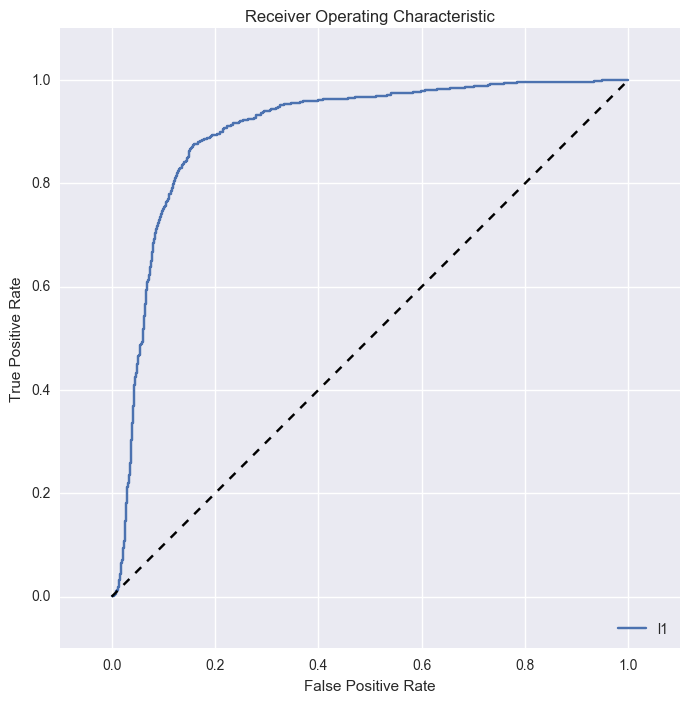

In [41]:
# Initialize figure
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [42]:
# Calculate ROC curve

# Calculate AUROC
print(auc(fpr, tpr))

0.901543001458


In [43]:
# Code here

for name, model in fitted_models.items():
    pred = model.predict_proba(X_test)
    pred = [p[1] for p in pred]
    
    fpr, tpr, thresholds = roc_curve(y_test, pred)
    print(name, auc(fpr, tpr))

rf 0.991520189216
l2 0.901538837374
gb 0.98857930464
l1 0.901543001458


In [44]:
# Save winning model as final_model.pkl
with open('final_model.pkl', 'wb') as f:
    pickle.dump( fitted_models['rf'].best_estimator_ , f)